Step 1: Load the Datasets


In [5]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
# Display first few rows for each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Step 2: Initial Dataset Exploration

In [7]:
#Customers Dataset

print(customers.info())
print(customers.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [8]:
#Products Dataset

print(products.info())
print(products.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [9]:
#Transactions Dataset

print(transactions.info())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Step 3: Handle Missing or Incorrect Data

In [10]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Confirm data types
print(customers.dtypes)
print(transactions.dtypes)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


Step 4: Merge the Datasets for Analysis

In [11]:
# Merge transactions and customers
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')

# Merge the above result with products
merged_data = pd.merge(customer_transactions, products, on='ProductID', how='left')

# Display merged data structure
print(merged_data.head())
print(merged_data.info())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

Task 3: Exploratory Data Analysis and Visualization

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


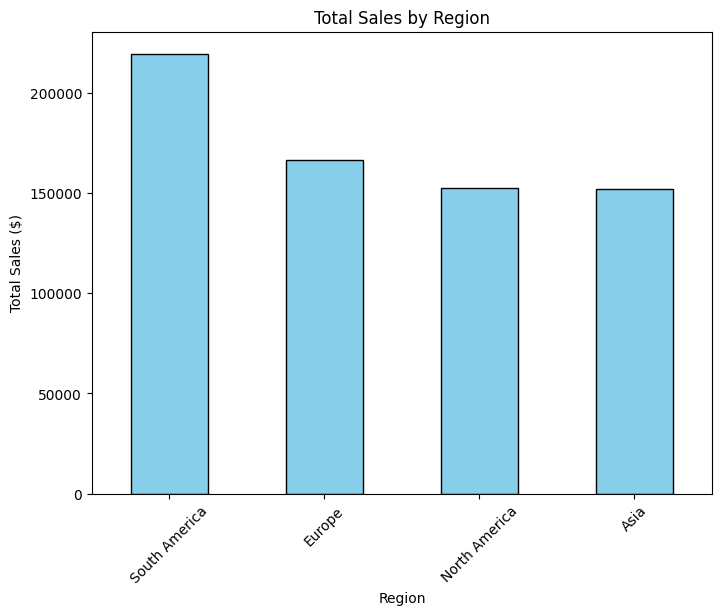

In [12]:
# Group sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_region)

# Plot sales by region
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


Insight 2: Top 5 Product Categories by Revenue

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


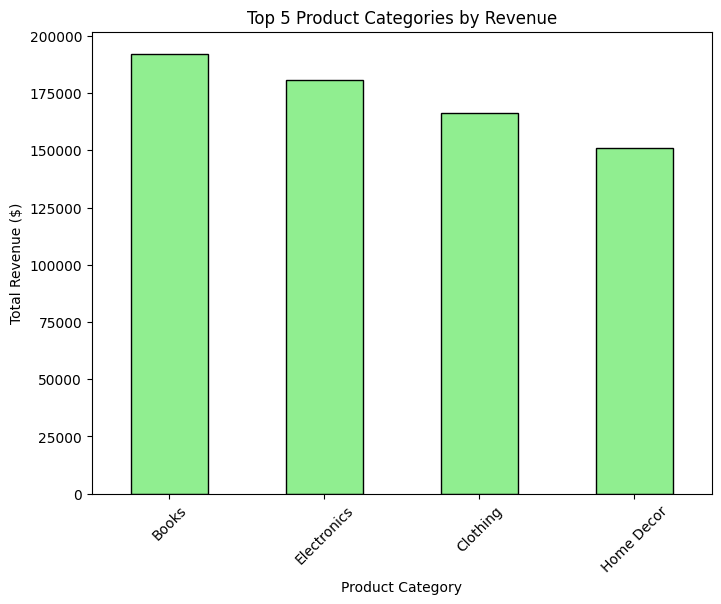

In [13]:
# Group sales by category
top_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_categories)

# Plot top categories
plt.figure(figsize=(8, 6))
top_categories.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 5 Product Categories by Revenue')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


Insight 3: Customer Signup Trend Over Time

SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


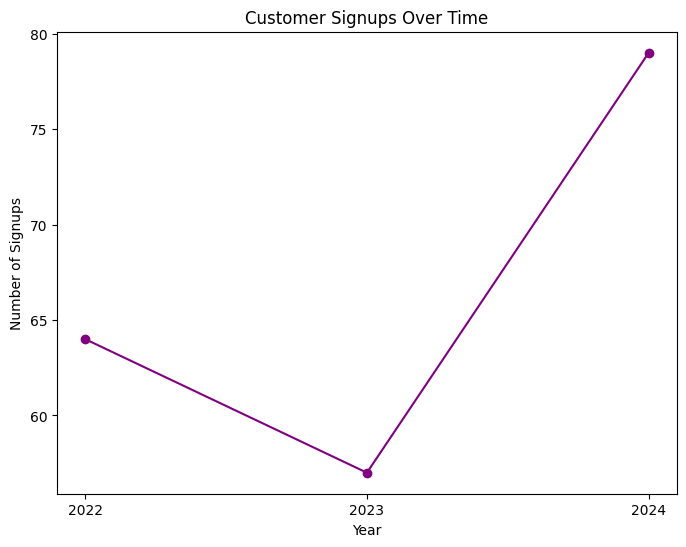

In [14]:
# Extract signup years and count
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()
print(signup_trend)

# Plot signup trend
plt.figure(figsize=(8, 6))
signup_trend.plot(kind='line', marker='o', color='purple')
plt.title('Customer Signups Over Time')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.xticks(signup_trend.index, rotation=0)
plt.show()


Insight 4: Most Frequently Purchased Products

ProductName
ActiveWear Smartwatch    40
SoundWave Headphones     38
BookWorld Biography      30
ActiveWear Rug           29
SoundWave Cookbook       29
Name: count, dtype: int64


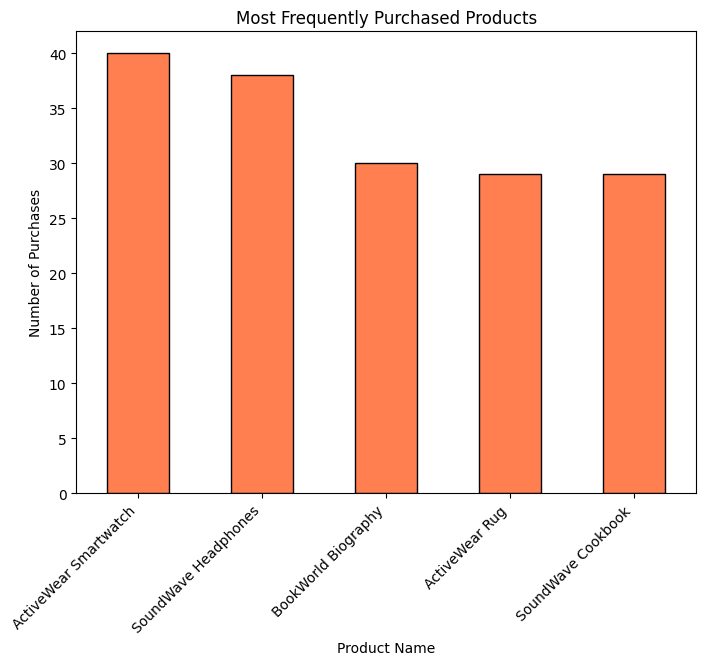

In [15]:
# Count product purchases
most_purchased_products = merged_data['ProductName'].value_counts().head(5)
print(most_purchased_products)

# Plot most purchased products
plt.figure(figsize=(8, 6))
most_purchased_products.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Most Frequently Purchased Products')
plt.ylabel('Number of Purchases')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()


Insight 5: Average Transaction Value

Average Transaction Value: $690.00


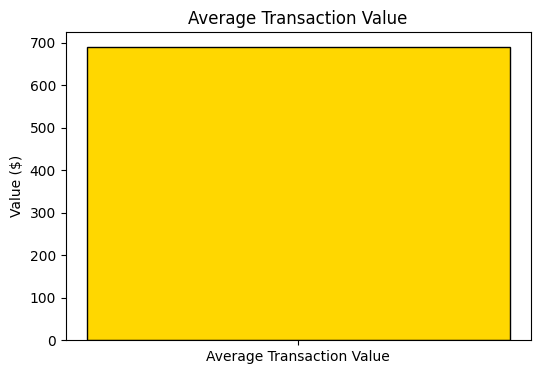

In [16]:
# Calculate average transaction value
avg_transaction_value = merged_data['TotalValue'].mean()
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")

# Plot average transaction value
plt.figure(figsize=(6, 4))
plt.bar(['Average Transaction Value'], [avg_transaction_value], color='gold', edgecolor='black')
plt.title('Average Transaction Value')
plt.ylabel('Value ($)')
plt.show()
